Jaidyn Vankirk

# Lab5: Decision Tree Learning

Figuring out the sex of a porcupine can be a difficult task. They aren't always easy to handle, and when they are young they show no sexual dimorphism. 

We've been trapping, photographing, and measuring a large species of porcupine in the hope of developing a model for determining the gender from various other features (such as body dimensions).   It is our hope that we can eventually be quite accurate from our photo-based measurements.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import statistics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reads in file (I did have prints where I tested this.)
df = pd.read_csv("animals.csv")
df = df.dropna()

#### Single Decision Tree Classifier

Use the sklearn Decision Tree Classifier to develop a train and evaluate and test a model for classifying the gender of our animals from the other feature data.

You should use 30% of your data for testing and 70% of your data for training.


In [3]:
#Transforms the gender column from 'm' and 'f' to 0 and 1.
label_encoder = preprocessing.LabelEncoder()
gender_label_encoder = label_encoder.fit(df.gender)
df.gender = gender_label_encoder.transform(df.gender)

#Splits gender off as the classification
X = df.drop('gender', axis=1)
y = df.gender

#Splits the train and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Creates the single decision tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
#Trains the single decision tree
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Test for Overfitting

Compare the accuracy of your trained model on your training data against the testing data.   If your decision tree overfitting?


In [4]:
#Function to calculate the percent that our tree classified correctly
def correct_percent(predicted, test_ans) -> float:
    counter = 0
    for i in range(len(predicted)):
        if predicted[i] == test_ans[i]:
            counter += 1
    
    return (counter/test_ans.size) * 100

In [5]:
predicted = gender_label_encoder.inverse_transform(tree.predict(X_test))
test_ans = gender_label_encoder.inverse_transform(y_test)

perc = correct_percent(predicted, test_ans)
print('Test Percent Correct: ' + str(perc))

predicted = gender_label_encoder.inverse_transform(tree.predict(X_train))
test_ans = gender_label_encoder.inverse_transform(y_train)

perc = correct_percent(predicted, test_ans)
print('Train Percent Correct: ' + str(perc))

Test Percent Correct: 51.61290322580645
Train Percent Correct: 100.0


# Bagging

Create a list of ten trained Decision Tree Classifiers trained using bagging (resampling with replacement).

Use the list of trained classifiers to test and evaluate using  test data. 

How does this compare with a single Decision Tree Classifier above

In [6]:
#Tallies the votes (what each tree has classified the given data) of the trees and gives a final prediction based on which classification has the highest amount of votes.
def vote(y, trees_predicted) -> []:
    predicted = []
    for i in range(len(y)):
        setOfPredictions = []
        for j in trees_predicted:
            setOfPredictions.append(j[i])
        predicted.append(statistics.mode(setOfPredictions))
    return predicted

In [7]:
#Will hold our 10 different trained decision trees
decision_trees = []
#Will hold the predictions they made about the test data and train data
trees_predicted_test = []
trees_predicted_train =[]
#For loop that trains our trees
for i in range(10):
    #Creates a copy of our training data
    train = X_train.copy()
    #Creates a copy of our training classification
    train['gender'] = y_train
    #Resamples our data with replacement
    Ti = resample(train, n_samples=len(train), replace=True)
    #I like to do this process multiple times
    for j in range(10):
        Ti = resample(Ti, n_samples=len(Ti), replace=True)
    #Seperate the training and classification data
    Xi_train = Ti[X_train.columns]
    yi_train = Ti['gender']
    #Adds the new tree
    decision_trees.append(DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1))
    #Trains the tree
    decision_trees[i].fit(Xi_train, yi_train)
    #Adds predictions
    trees_predicted_test.append(gender_label_encoder.inverse_transform(decision_trees[i].predict(X_test)))
    trees_predicted_train.append(gender_label_encoder.inverse_transform(decision_trees[i].predict(X_train)))

predicted_test = vote(y_test, trees_predicted_test)

#voting for train data
predicted_train = vote(y_train, trees_predicted_train)

test_ans = gender_label_encoder.inverse_transform(y_test)
perc = correct_percent(predicted_test, test_ans)
print('Test Percent Correct: ' + str(perc))


test_ans = gender_label_encoder.inverse_transform(y_train)
perc = correct_percent(predicted_train, test_ans)
print('Train Percent Correct: ' + str(perc))
    

StatisticsError: no mode for empty data

# Random Forest

Repeat the above using sklearn's *RandomForestClassifier*.

Refer to the following:  https://builtin.com/data-science/random-forest-algorithm 


In [ ]:
#Creates the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predicted = gender_label_encoder.inverse_transform(rf.predict(X_test))
test_ans = gender_label_encoder.inverse_transform(y_test)

perc = correct_percent(predicted, test_ans)
print('Test Percent Correct: ' + str(perc))

predicted = gender_label_encoder.inverse_transform(rf.predict(X_train))
test_ans = gender_label_encoder.inverse_transform(y_train)

perc = correct_percent(predicted_train, test_ans)
print('Train Percent Correct: ' + str(perc))

Test Percent Correct: 54.83870967741935
Train Percent Correct: 78.57142857142857


#### Which features are important?

#### What are the target variable prediction probabilities for your test?

<BarContainer object of 10 artists>

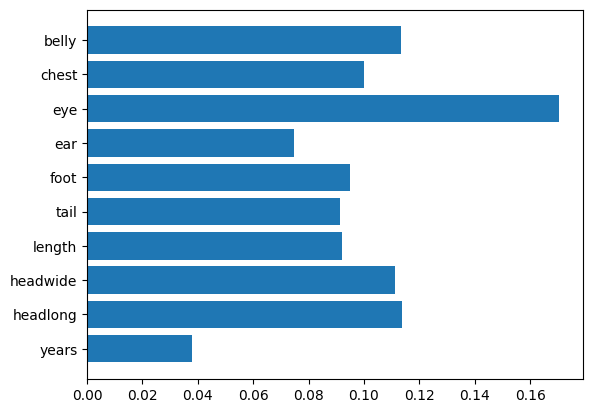

In [ ]:
values = df.columns.values
values = np.delete(values, 0)
plt.barh(values, rf.feature_importances_)

## Reflection ##

#### What did you learn? ####
Append a markdown cell providing a bulleted list of observations and/or lessons learned.

The Single Decision Tree has a tendency to overfit. It always averages around 50% for the test data and 90-100% for the train data. With bagging, it tends to get around the same accuracy as the one tree, but the accuracy for the train data is around 70%, meaning that it is doing less overfitting. The Random forest tends to be 60-70% percent, with accuracy for the training being around 65-70%. However, this also could partially be due to my runs. The random forest classifier overfits the least and is the most accurate. In addition, it allows us to understand what features are the most important in our data set, although, for me, it changes every run.